### Goal:
## Explore the Iris dataset, clean data, perform analysis, and build a classification model using NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn.

### 1. Why This Project?
#### 1. Learn data cleaning and preprocessing using Pandas.
#### 2. Use NumPy for statistical calculations (mean, median, standard deviation).
#### 3. Visualize data patterns and relationships using Matplotlib and Seaborn.
#### 4. Understand how flower measurements (sepal length, sepal width, petal length, petal width) relate to species.
#### 5. Build and evaluate a machine learning model to classify Iris flower species.


### 2. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3.Load Dataset

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4.Explore Data

In [4]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn names:", df.columns.tolist())

# Unique species
print("\nUnique species:", df['species'].unique())

# Count of each species
print("\nSpecies count:\n", df['species'].value_counts())


Shape of dataset: (150, 5)

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Unique species: ['setosa' 'versicolor' 'virginica']

Species count:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


Insights:

Shape: (150, 5) → 150 samples and 5 features.

Species count: Each species has exactly 50 samples → perfectly balanced dataset.

Dataset is cleanly structured and suitable for analysis or model building.

### 5.Data Cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Duplicate rows: 1


Insights:

No missing values 

All numerical columns are of type float64, and the target column is object.

No duplicate rows found.
Dataset is clean and ready for analysis.

### 6: Analysis with NumPy and Pandas

In [6]:
# Mean, median, std using NumPy
mean_values = np.mean(df.iloc[:, :-1], axis=0)
median_values = np.median(df.iloc[:, :-1], axis=0)
std_values = np.std(df.iloc[:, :-1], axis=0)

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard deviation:\n", std_values)


Mean values:
 sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Median values:
 [5.8  3.   4.35 1.3 ]

Standard deviation:
 sepal_length    0.825301
sepal_width     0.434411
petal_length    1.759404
petal_width     0.759693
dtype: float64


Insights:

Petal length and petal width show larger variations between species → important for classification.

Sepal width has the smallest variation.

NumPy confirms consistent central tendency across species groups.

### 7.Visualization with Matplotlib

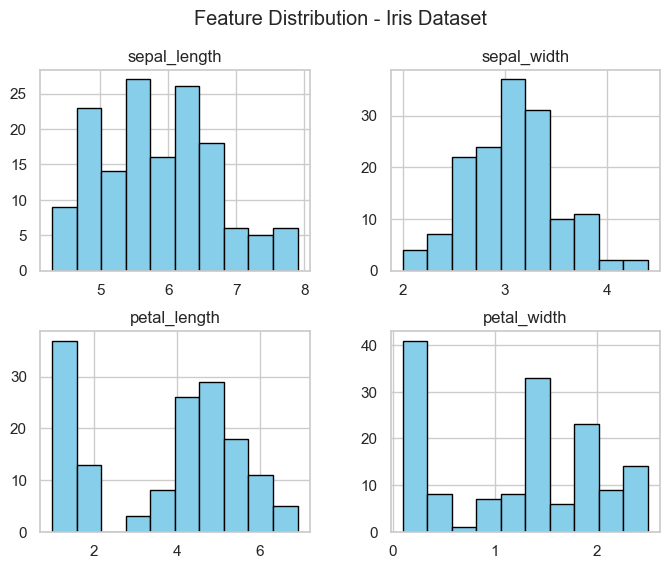

In [7]:
#Histogram
import matplotlib.pyplot as plt

df.iloc[:, :-1].hist(figsize=(8,6), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distribution - Iris Dataset')
plt.show()


Insights:

Petal features show distinct distributions → can help distinguish species.

### 8.Visualization with Seaborn

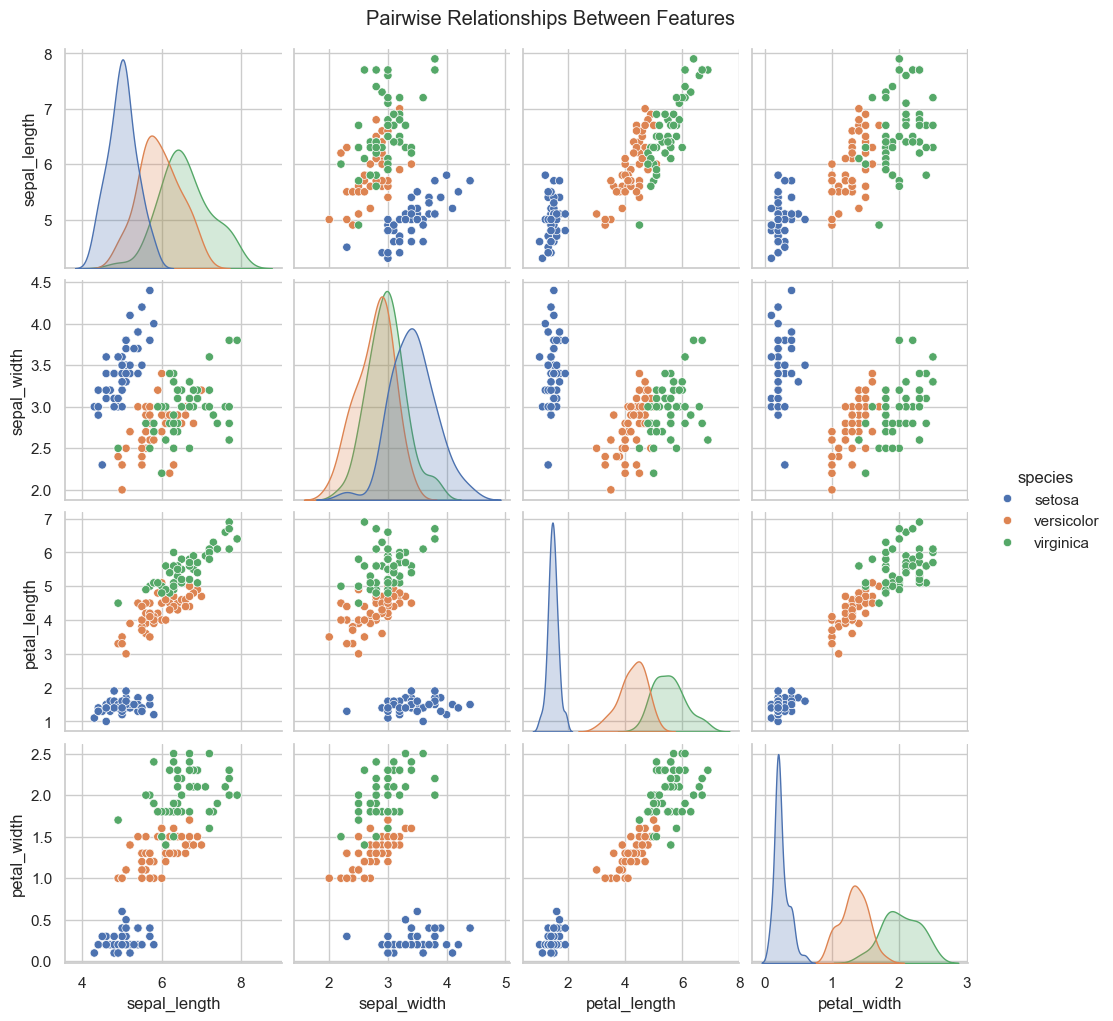

In [9]:
#pairplot
import seaborn as sns

sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()


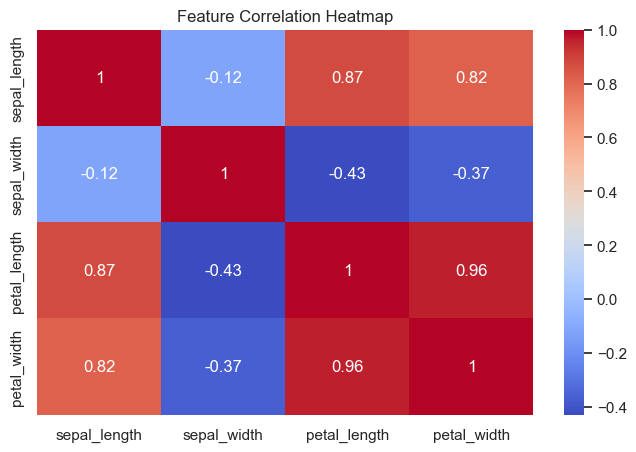

In [11]:
#heatmap
# Heatmap (fixed version)
plt.figure(figsize=(8,5))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



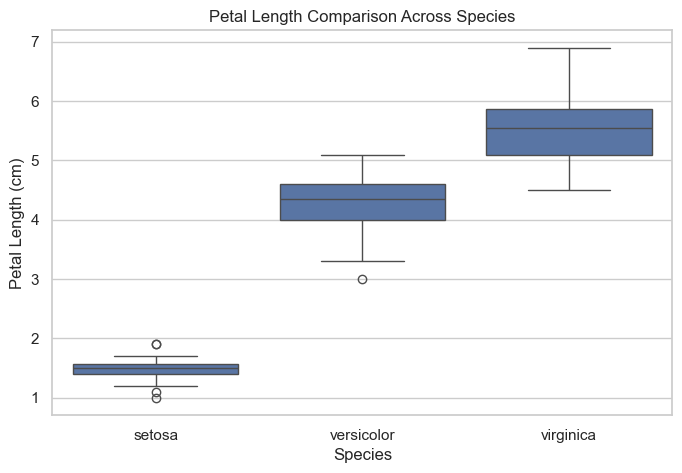

In [15]:
#boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length Comparison Across Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()



Insights:

Pairplot:

Setosa is clearly separable from others → simplest to classify.

Versicolor and Virginica overlap slightly → moderate challenge in classification.

Heatmap:

Strong correlation (≈0.96) between petal length and petal width.

Sepal features are weakly correlated.

Petal measurements are the best predictors.

Boxplot:

Setosa has smallest petals.

Virginica has longest petals.

Versicolor lies in between.

# EDA

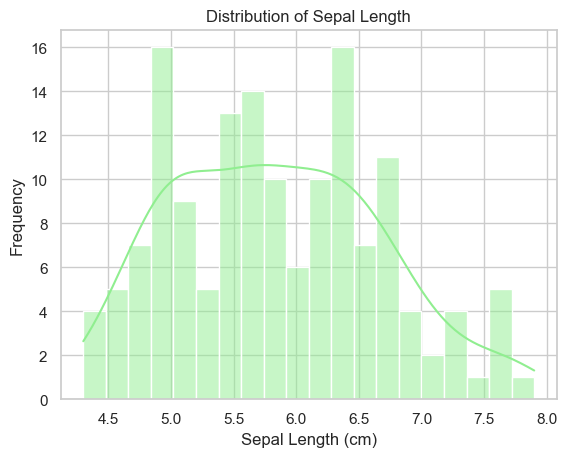

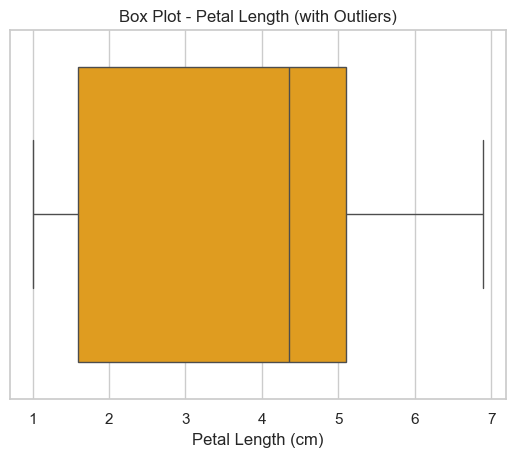

In [4]:
#  Univariate analysis - Numerical Features

# Select numerical columns
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

# Histogram: Sepal Length
sns.histplot(df['sepal_length'], bins=20, kde=True, color='lightgreen')
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

# Box Plot: Petal Length
sns.boxplot(x=df['petal_length'], color='orange')
plt.title("Box Plot - Petal Length (with Outliers)")
plt.xlabel("Petal Length (cm)")
plt.show()


C:\Users\chund\AppData\Local\Temp\ipykernel_2076\1029304521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


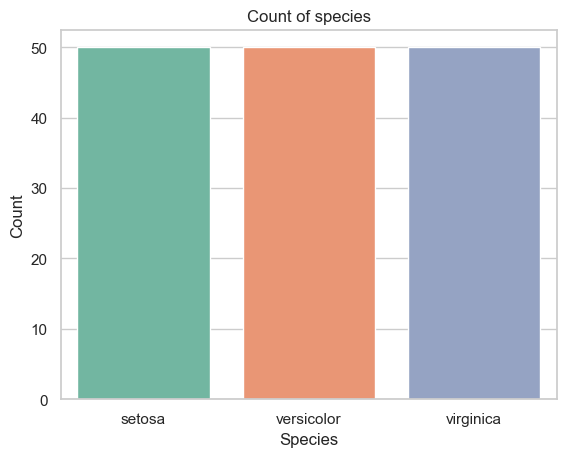

In [5]:
# 7. Univariate Analysis - Categorical Features

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"Count of {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.show()


C:\Users\chund\AppData\Local\Temp\ipykernel_2076\1993366576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_length', data=df, palette='Set2')


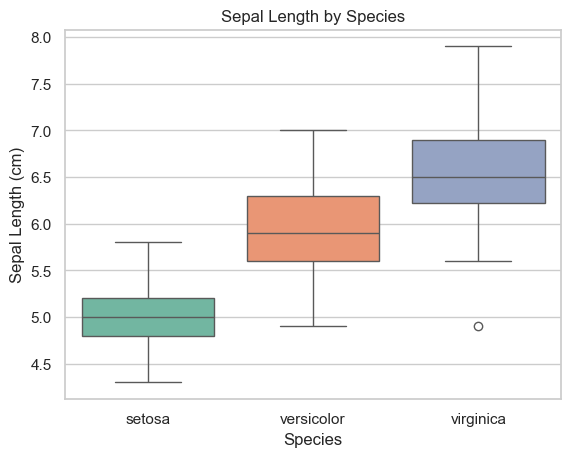

C:\Users\chund\AppData\Local\Temp\ipykernel_2076\1993366576.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=df, palette='Set3')


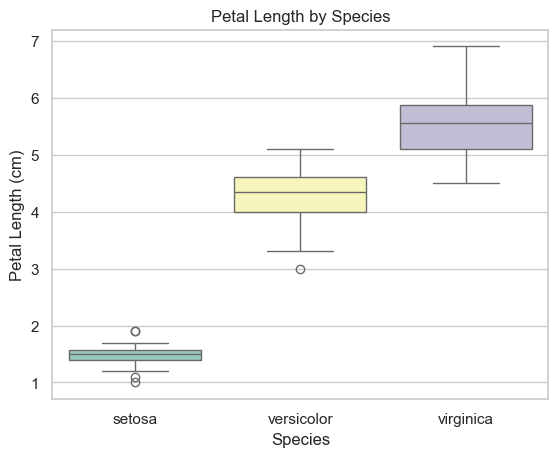

In [6]:
# 8. Bivariate Analysis - Numerical vs Categorical

# Box Plot: Sepal Length by Species
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set2')
plt.title("Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

# Box Plot: Petal Length by Species
sns.boxplot(x='species', y='petal_length', data=df, palette='Set3')
plt.title("Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()


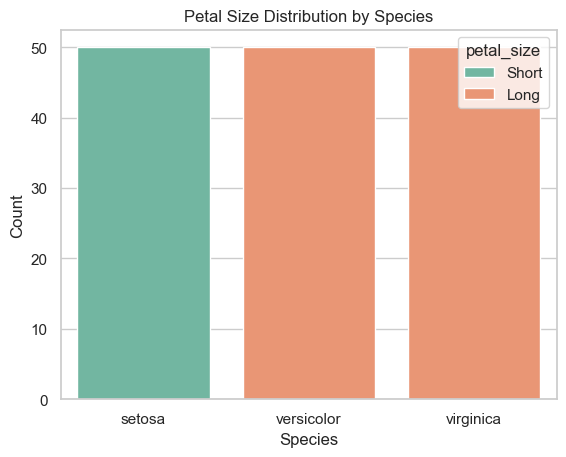

In [7]:
# 9. Bivariate Analysis - Categorical vs Categorical

# Since Iris has only one categorical column ('species'),
# we’ll create an example using a comparison-like view
# by grouping with a derived categorical feature.

# Example: Categorize petal length as 'Short' or 'Long'
df['petal_size'] = pd.cut(df['petal_length'], bins=[0, 2, 7], labels=['Short', 'Long'])

# Count Plot: Petal Size by Species
sns.countplot(x='species', hue='petal_size', data=df, palette='Set2')
plt.title("Petal Size Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()


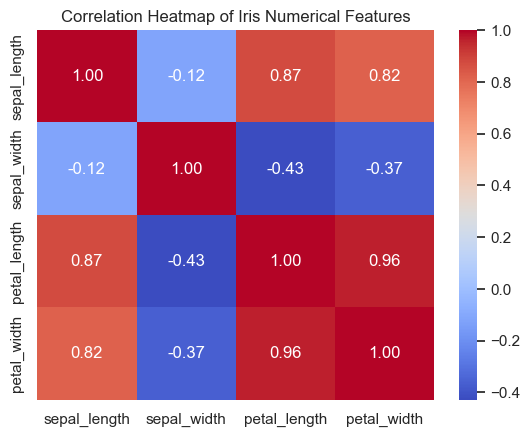

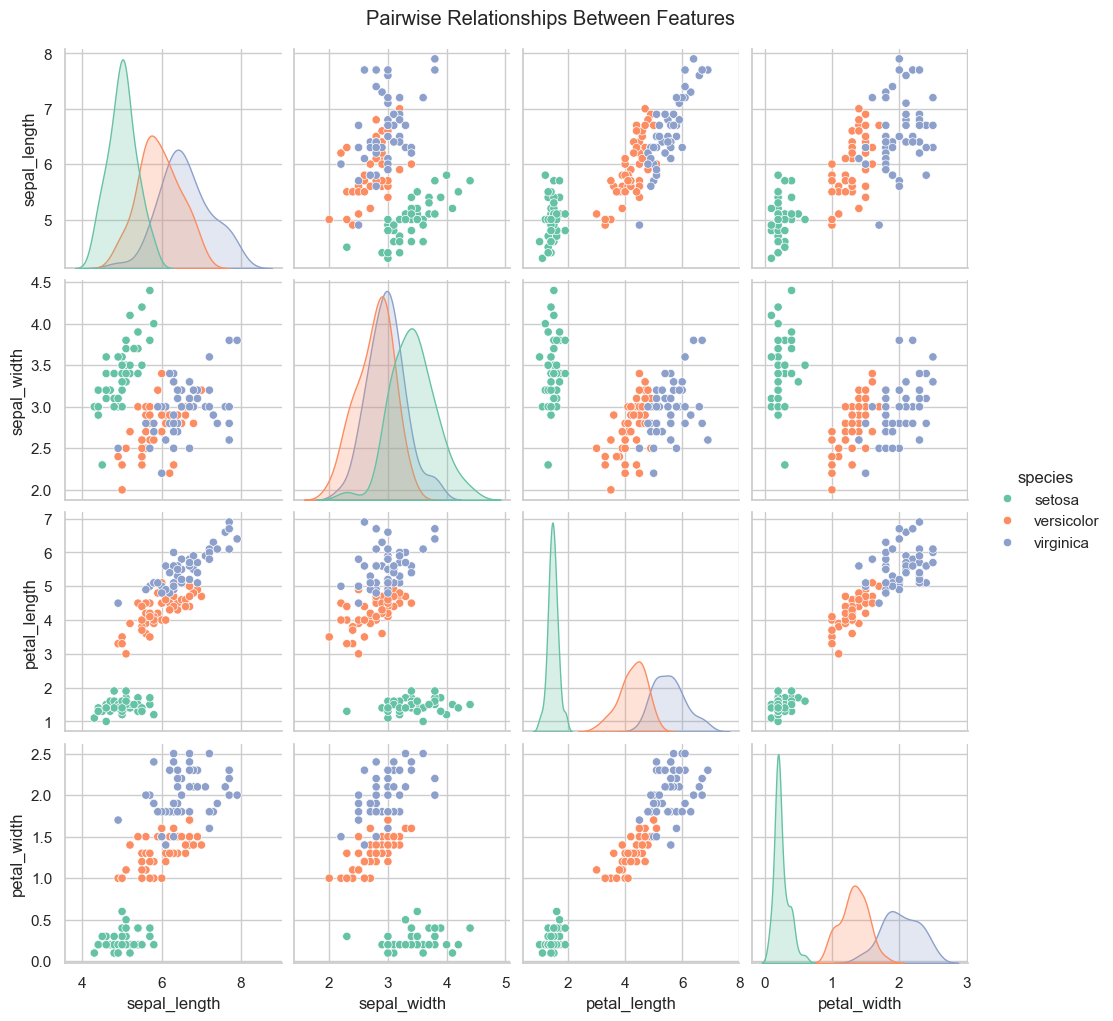

In [8]:
# 10. Correlation and Multivariate Analysis

# Correlation matrix for numerical features
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Iris Numerical Features")
plt.show()

# Pairplot
sns.pairplot(df, hue='species', diag_kind='kde', palette='Set2')
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


Number of outliers in Sepal Length: 0


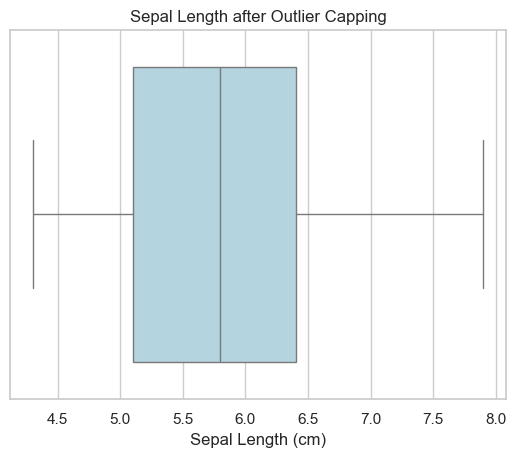

In [9]:
# 11. Outlier Detection using IQR (Interquartile Range)

# Example on 'sepal_length'
Q1 = df['sepal_length'].quantile(0.25)
Q3 = df['sepal_length'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['sepal_length'] < lower) | (df['sepal_length'] > upper)]
print("Number of outliers in Sepal Length:", len(outliers))

# Cap the outliers
df['sepal_length_capped'] = df['sepal_length'].clip(lower, upper)

# Boxplot after capping
sns.boxplot(x=df['sepal_length_capped'], color='lightblue')
plt.title("Sepal Length after Outlier Capping")
plt.xlabel("Sepal Length (cm)")
plt.show()


C:\Users\chund\AppData\Local\Temp\ipykernel_2076\266153045.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_area', data=df, palette='Set2')


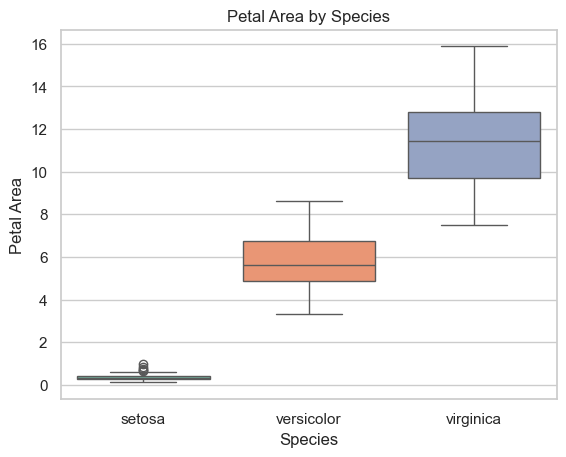

,sepal_area,petal_area,species
0,17.85,0.28,setosa
1,14.70,0.28,setosa
2,15.04,0.26,setosa
3,14.26,0.30,setosa
4,18.00,0.28,setosa


In [10]:
# 12. Feature Engineering
# Create new features based on existing ones

# Example 1: Create a new feature for Petal Area
df['petal_area'] = df['petal_length'] * df['petal_width']

# Example 2: Create a new feature for Sepal Area
df['sepal_area'] = df['sepal_length'] * df['sepal_width']

# Compare Petal Area across species
sns.boxplot(x='species', y='petal_area', data=df, palette='Set2')
plt.title("Petal Area by Species")
plt.xlabel("Species")
plt.ylabel("Petal Area")
plt.show()

# Display new features
df[['sepal_area', 'petal_area', 'species']].head()


In [11]:
# 13. Export the Cleaned Data
df.to_csv("Iris_cleaned.csv", index=False)
print("\nCleaned Iris data saved as Iris_cleaned.csv")



Cleaned Iris data saved as Iris_cleaned.csv
